In [3]:
import tensorflow as tf 
import cv2
import os
import pandas as pd

In [4]:
nomsTest = []
categoriesTest = []

filenames = os.listdir("allImagesNoMask/test")
for file in filenames:
    nomsTest.append(file)
    categoriesTest.append(0)

filenames = os.listdir("allImagesMask/test")
for file in filenames:
    nomsTest.append(file)
    categoriesTest.append(1)


nomsTrain = []
categoriesTrain = []

filenames = os.listdir("allImagesNoMask/train")
for file in filenames:
    nomsTrain.append(file)
    categoriesTrain.append(0)

filenames = os.listdir("allImagesMask/train")
for file in filenames:
    nomsTrain.append(file)
    categoriesTrain.append(1)

In [5]:
dfTrain = pd.DataFrame({
    'filename': nomsTrain,
    'category': categoriesTrain
})

dfTest = pd.DataFrame({
    'filename': nomsTest,
    'category': categoriesTest
})

In [6]:
from sklearn.utils import shuffle
dfTrain = shuffle(dfTrain)
dfTrain.reset_index(inplace=True, drop=True)
dfTest = shuffle(dfTest)
dfTest.reset_index(inplace=True, drop=True)

In [7]:
dfTrain.head()

,filename,category
0,1803151818-00001245-with-mask.jpg,1
1,1803151818-00011396.jpg,0
2,1803151818-00001477-with-mask.jpg,1
3,1803151818-00022287-with-mask.jpg,1
4,1803151818-00002604-with-mask.jpg,1


In [8]:
import numpy as np
import matplotlib.image as mpimg
import cv2

train_images = []
train_labels = []
for el in dfTrain.values:
    if el[1] == 0:
        aux = mpimg.imread('allImagesNoMask/train' + '/' + el[0])
    else:
        aux = mpimg.imread('allImagesMask/train' + '/' + el[0])
    aux = cv2.resize(aux, (30, 40), interpolation = cv2.INTER_AREA)
    train_labels.append(el[1])
    train_images.append(aux)


test_images = []
test_labels = []
for el in dfTest.values:
    if el[1] == 0:
        aux = mpimg.imread('allImagesNoMask/test' + '/' + el[0])
    else:
        aux = mpimg.imread('allImagesMask/test' + '/' + el[0])
    aux = cv2.resize(aux, (30, 40), interpolation = cv2.INTER_AREA)
    test_labels.append(el[1])
    test_images.append(aux)

In [9]:
x_t = np.array(train_images)
x_v = np.array(test_images)

In [10]:
l_t = np.array(train_labels)
l_v = np.array(test_labels)

In [11]:
from tensorflow.keras import datasets, layers, models
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(40, 30, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [13]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 38, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                9

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
history = model.fit(x_t, l_t, epochs=10, validation_data=(x_v, l_v))

Epoch 1/10
711/711 [==============================] - 19s 17ms/step - loss: 0.2848 - accuracy: 0.9679 - val_loss: 0.0827 - val_accuracy: 0.9745
Epoch 2/10
711/711 [==============================] - 11s 15ms/step - loss: 0.0156 - accuracy: 0.9954 - val_loss: 0.0498 - val_accuracy: 0.9862
Epoch 3/10
711/711 [==============================] - 11s 15ms/step - loss: 0.0136 - accuracy: 0.9957 - val_loss: 0.0612 - val_accuracy: 0.9821
Epoch 4/10
711/711 [==============================] - 11s 15ms/step - loss: 0.0094 - accuracy: 0.9972 - val_loss: 0.0495 - val_accuracy: 0.9858
Epoch 5/10
711/711 [==============================] - 11s 15ms/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.0400 - val_accuracy: 0.9894
Epoch 6/10
711/711 [==============================] - 11s 16ms/step - loss: 0.0103 - accuracy: 0.9972 - val_loss: 0.0355 - val_accuracy: 0.9905
Epoch 7/10
711/711 [==============================] - 12s 16ms/step - loss: 0.0113 - accuracy: 0.9972 - val_loss: 0.0741 - val_accuracy:

In [17]:
model.save_weights('modelWeights/MaskDetector')

711/711 - 3s - loss: 0.0311 - accuracy: 0.9916


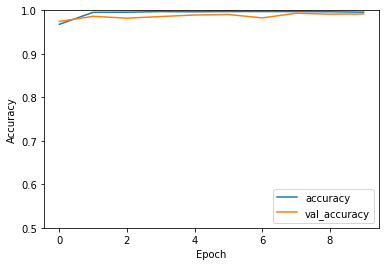

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_v,  l_v, verbose=2)

In [19]:
files = os.listdir("VALIDATION_/")

In [20]:
original = []
test = []
for el in files:
    aux = mpimg.imread('VALIDATION_/' + el)
    original.append(aux)
    aux = cv2.resize(aux, (30, 40), interpolation = cv2.INTER_AREA)
    test.append(aux)

In [21]:
y_prob = model.predict(np.array(test)) 
y_classes = y_prob.argmax(axis=-1)

In [22]:
answ = []
for el in y_classes:
    if el == 0:
        answ.append("without mask")
    else:
        answ.append("with mask")
answ = np.array(answ)

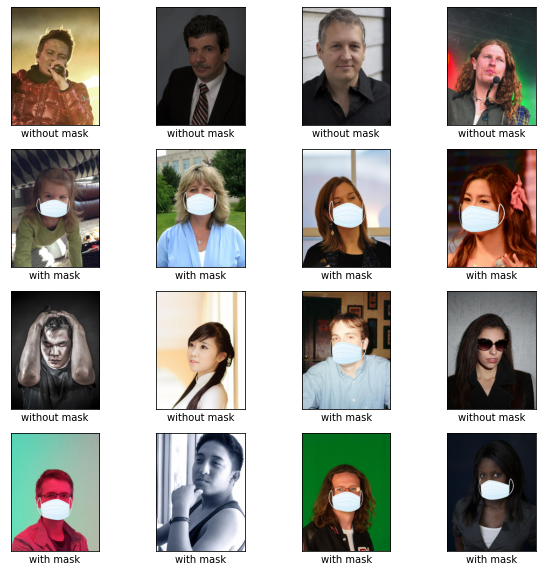

In [23]:
plt.figure(figsize=(10,10))
for i in range(len(original)):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(original[i], cmap=plt.cm.binary)
    plt.xlabel(answ[i])
plt.show()